# 2/1 vs. 4/2 Coarsening: Mock Cycle Rates vs. $kh$

In [96]:
%run /Users/olivne/helmholtz/src/helmholtz/startup.ipy
import itertools

In [97]:
### Fixed seed for reproducible results.
np.random.seed(2)

# Domain size.
n = 96 # 192
domain_size = n   # With meshsize h = 1.
# Scaled wave number. Fit so lam_min = 0 (integer # periods in domain).
discretization = "3-point"
repetitive = True

# Test vectors.
ideal_tv = False    # Use eigenvectors or not.
# Number of test vectors.  
num_examples = 4

# Set # sweeps manually here.
num_sweeps_on_vectors = None
threshold = 0.1

# Boottstrapping parameters.
interpolation_method = "ls" # "weighted_ls" #"ls"
fit_scheme = "ridge" #"plain"
weighted = False #True
neighborhood = "extended" #"aggregate" # "extended"
num_test_examples = 5
leeway_factor = 1.3

## Level 0->1 Coarsening

### Coarsening: Fixed (2/1)

In [104]:
kh_values = np.linspace(0, 3, 20)
coarsening_info_21 = pd.DataFrame([hm.analysis.stats.mock_cycle_rate(hm.linalg.helmholtz_1d_discrete_operator(kh, discretization, n), 2, 1) for kh in kh_values], index=kh_values, columns=("Shrinkage", "#sweeps") + tuple(nu_values))
coarsening_info_42 = pd.DataFrame([hm.analysis.stats.mock_cycle_rate(hm.linalg.helmholtz_1d_discrete_operator(kh, discretization, n), 4, 2) for kh in kh_values], index=kh_values, columns=("Shrinkage", "#sweeps") + tuple(nu_values))

In [103]:
coarsening_info_21

,Shrinkage,#sweeps,1,2,3,4,5,6,7,8,9,10,11
0.0000,0.6518,24,0.4870,0.2107,0.1915,0.1691,0.1076,0.0901,0.0817,0.0713,0.0672,0.0626,0.0617
0.1579,0.6515,24,0.4966,0.2146,0.1999,0.1703,0.1107,0.0912,0.0858,0.0742,0.0700,0.0662,0.0638
0.3158,0.6439,24,0.5143,0.2185,0.2078,0.1801,0.1234,0.1015,0.0976,0.0856,0.0829,0.0776,0.0749
0.4737,0.6809,28,0.5319,0.2254,0.2149,0.2017,0.1485,0.1122,0.1179,0.1075,0.1004,0.0995,0.0966
0.6316,0.6569,24,0.5788,0.2328,0.2227,0.2271,0.1861,0.1332,0.1420,0.1380,0.1325,0.1307,0.1283
0.7895,0.6950,28,0.6428,0.3136,0.2272,0.2588,0.2360,0.1953,0.1726,0.1834,0.1826,0.1755,0.1724
0.9474,0.7049,32,0.6834,0.4334,0.2081,0.2657,0.2923,0.2784,0.2465,0.2293,0.2364,0.2281,0.2382
1.1053,0.6970,32,0.7919,0.5688,0.4242,0.2691,0.2573,0.3163,0.3331,0.3286,0.3284,0.3148,0.3021
1.2632,0.5934,20,0.8747,0.7718,0.7147,0.6359,0.5474,0.4817,0.4233,0.3776,0.3541,0.3612,0.3648
1.4211,0.4803,12,0.9329,0.9330,0.9419,0.9372,0.9273,0.9204,0.9176,0.8754,0.8670,0.8709,0.9383


In [45]:
coarsening_info_21

,Shrinkage,#sweeps,1,2,3,4,5,6,7,8,9,10,11
0.0000,0.6568,24,0.9346,0.9718,0.9294,0.9755,0.9547,0.9314,0.9607,0.9666,0.9507,0.9616,0.9495
0.1579,0.6746,28,0.9477,0.9556,0.9479,0.9699,0.9563,0.9684,0.9667,0.9730,0.9675,0.9598,0.9755
0.3158,0.6695,28,0.9418,0.9569,0.9415,0.9620,0.9594,0.9607,0.9629,0.9697,0.9575,0.9649,0.9590
0.4737,0.6553,24,0.9434,0.9362,0.9408,0.9381,0.9348,0.9349,0.9283,0.9285,0.9098,0.9379,0.9315
0.6316,0.6982,28,0.9021,0.8966,0.9093,0.8890,0.8945,0.8991,0.8965,0.8869,0.8766,0.8906,0.8912
0.7895,0.6983,28,0.8415,0.8216,0.8385,0.8395,0.8338,0.8191,0.8224,0.8405,0.8030,0.8301,0.8332
0.9474,0.7088,32,0.8061,0.7224,0.7550,0.7904,0.7846,0.7608,0.7384,0.7654,0.7545,0.7703,0.7609
1.1053,0.6998,32,0.8191,0.6792,0.6341,0.6523,0.6919,0.6940,0.6952,0.6933,0.6879,0.6542,0.6837
1.2632,0.6052,20,0.8911,0.7990,0.7240,0.6586,0.6072,0.5600,0.5581,0.5512,0.5580,0.5645,0.5601
1.4211,0.4774,12,0.9581,0.9121,0.9508,0.9314,0.9144,0.9024,0.9769,0.9421,0.8730,0.9560,0.8428


In [30]:
coarsening_info_42

,Shrinkage,#sweeps,1,2,3,4,5,6,7,8,9,10,11
0.0000,0.6460,24,0.4736,0.2259,0.1532,0.1343,0.0909,0.0554,0.0561,0.0455,0.0400,0.0359,0.0327
0.1579,0.6452,24,0.4805,0.2279,0.1537,0.1383,0.0980,0.0591,0.0593,0.0496,0.0411,0.0432,0.0363
0.3158,0.6477,24,0.4913,0.2405,0.1662,0.1367,0.1108,0.0646,0.0694,0.0594,0.0512,0.0481,0.0450
0.4737,0.6762,28,0.5122,0.2616,0.1678,0.1412,0.1248,0.0715,0.0584,0.0522,0.0476,0.0476,0.0408
0.6316,0.6940,28,0.5745,0.2787,0.1583,0.1352,0.1368,0.0954,0.0603,0.0586,0.0549,0.0464,0.0415
0.7895,0.6980,28,0.6152,0.3373,0.1611,0.1234,0.1508,0.1403,0.0966,0.0698,0.0633,0.0601,0.0510
0.9474,0.7012,32,0.6469,0.3041,0.1649,0.1508,0.1061,0.0841,0.0743,0.0654,0.0548,0.0496,0.0469
1.1053,0.6896,28,0.4669,0.2851,0.1505,0.1513,0.0637,0.0458,0.0362,0.0294,0.0273,0.0267,0.0273
1.2632,0.5689,16,0.4291,0.2195,0.1112,0.0560,0.0339,0.0285,0.0225,0.0188,0.0167,0.0136,0.0117
1.4211,0.5291,16,0.3214,0.1305,0.0776,0.0208,0.0254,0.0158,0.0155,0.0132,0.0102,0.0096,0.0091


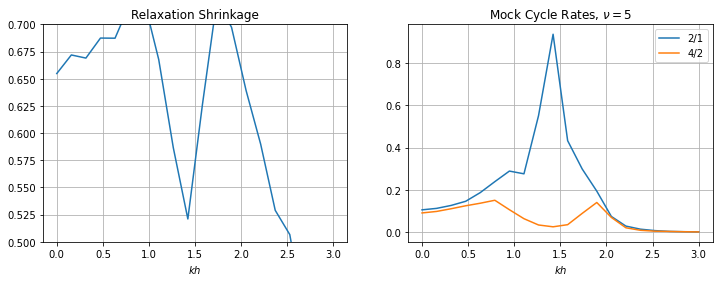

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))


ax = axs[0]
ax.set_ylim([0.5, 0.7])
ax.plot(kh_values, coarsening_info_21[["Shrinkage"]])
ax.set_title("Relaxation Shrinkage")
ax.set_xlabel("$kh$")
ax.grid()

ax = axs[1]
ax.plot(kh_values, coarsening_info_21[[5]], label="2/1")
ax.plot(coarsening_info_42[[5]], label="4/2")
ax.set_title("Mock Cycle Rates, $\\nu = 5$")
ax.set_xlabel("$kh$")
ax.grid()
ax.legend();

In [50]:
a = hm.linalg.helmholtz_1d_discrete_operator(2 ** 0.5, "3-point", 96)
a[2, :5].todense()

a = hm.linalg.helmholtz_1d_discrete_operator(2 ** 0.5, "5-point", 96)
a[2, :5].todense()
sum(np.linalg.eig(a.todense())[0] > 0)

matrix([[-0.083,  1.333, -0.5  ,  1.333, -0.083]])

In [86]:
# level 4
stencil = np.array([-0.092, -0.403, -0.495, -0.403, -0.092])
# level 3
#stencil = np.array([ 0.007,  0.160,  0.168,  0.160, 0.007])
a = hm.linalg.helmholtz_1d_discrete_operator(None, "custom", 96, stencil=stencil)

# 5-point discetization with the effective kh of the stencils above.
#a = hm.linalg.helmholtz_1d_discrete_operator(2 ** 0.5, "3-point", n)
#a = hm.linalg.helmholtz_1d_discrete_operator(1.423, "5-point", n)
#a = hm.linalg.helmholtz_1d_discrete_operator(1.634, "5-point", n)
#kh = 1.9909425 ** 0.5
kh = 0.8 ** 0.5
print("kh", kh)
a = hm.linalg.helmholtz_1d_discrete_operator(kh, "3-point", n)

level = hm.setup.hierarchy.create_finest_level(a)
multilevel = hm.setup.hierarchy.multilevel.Multilevel.create(level)
level.location = np.arange(n)

shrinkage_factor, _, _, _, _, relax_conv_factor = hm.solve.smoothing.shrinkage_factor(
    level.operator, lambda x, b: level.relax(x, b), (a.shape[0],),
    max_sweeps=20, slow_conv_factor=1.1, leeway_factor=leeway_factor)
print("relax_conv_factor", relax_conv_factor)

method_info = hm.solve.smoothing.check_relax_cycle_shrinkage(
    multilevel, num_levels=1, leeway_factor=leeway_factor, slow_conv_factor=0.95, num_examples=5, print_frequency=None, plot=False)
info = method_info["relax"]
shrinkage = info[0]
num_sweeps = 2 * method_info["relax"][1]

# Create relaxed TVs.
x_random = hm.solve.run.random_test_matrix((level.a.shape[0],), num_examples=4)
for aggregate_size, num_components in ((2, 1), (4, 2)):
    print("aggregate_size, num_components", aggregate_size, num_components)
    b = np.zeros_like(x_random)
    x = hm.solve.run.run_iterative_method(
        level.operator, lambda x: level.relax(x, b), x_random, num_sweeps=num_sweeps)[0]

    # Create coarsening.
    r, s = hm.repetitive.locality.create_coarsening(x, aggregate_size, num_components, normalize=False)
    r = r.asarray()
    if aggregate_size == 2:
        r = np.array([[1, -1]])
    elif aggregate_size == 4:
        # r = np.array([[-1, 1, 1, -1],
        #               [1, 1, -1, -1]])
        r = np.array([[0, 1, 0, -1],
                      [-1, 0, 1, 0]])
    print(r)
    R = hrc.Coarsener(r).tile(level.a.shape[0] // aggregate_size)
    print(np.array([hm.setup.auto_setup.mock_cycle_conv_factor(level, R, nu) for nu in nu_values]))

kh 0.8944271909999159
relax_conv_factor 0.9616481831379957
aggregate_size, num_components 2 1
[[ 1 -1]]
[0.812 0.764 0.782 0.805 0.776 0.786 0.784 0.794 0.783 0.795 0.795]
aggregate_size, num_components 4 2
[[ 0  1  0 -1]
 [-1  0  1  0]]
[0.781 0.763 0.777 0.766 0.733 0.717 0.704 0.704 0.689 0.674 0.657]


In [67]:
discretization = "5-point"
#kh = helmholtz.analysis.ideal.find_singular_kh(discretization, n)[0]
kh = 1.9909425 ** 0.5
print("kh", kh)
a = hm.linalg.helmholtz_1d_discrete_operator(kh, discretization, n)
lam, v = eig(a.todense())
lam = np.real(lam)
idx = np.where(np.abs(lam) < 1e-5)[0]
np.sort(lam), idx

kh 1.4110076186895661


(array([-3.342, -3.335, -3.335, -3.314, -3.314, -3.278, -3.278, -3.229, -3.229, -3.166, -3.166, -3.091, -3.091, -3.002, -3.002, -2.902, -2.902, -2.79 , -2.79 , -2.668, -2.668, -2.536, -2.536, -2.395, -2.395, -2.246, -2.246, -2.089, -2.089, -1.927, -1.927, -1.759, -1.759, -1.587, -1.587, -1.412, -1.412, -1.234, -1.234, -1.055, -1.055, -0.875, -0.875, -0.696, -0.696, -0.518, -0.518, -0.342, -0.342, -0.169, -0.169, -0.   , -0.   ,  0.165,  0.165,  0.325,  0.325,  0.48 ,  0.48 ,  0.629,  0.629,
         0.772,  0.772,  0.908,  0.908,  1.036,  1.036,  1.157,  1.157,  1.271,  1.271,  1.377,  1.377,  1.474,  1.474,  1.563,  1.563,  1.644,  1.644,  1.717,  1.717,  1.781,  1.781,  1.837,  1.837,  1.884,  1.884,  1.922,  1.922,  1.952,  1.952,  1.974,  1.974,  1.987,  1.987,  1.991]),
 array([54, 55]))

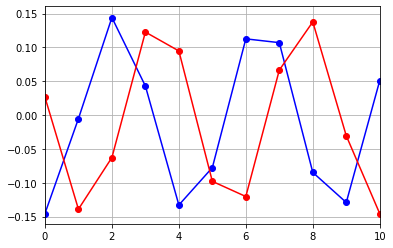

In [72]:
u1, u2 = v[:, idx[0]], v[:, idx[1]]
plt.plot(u1 - 0.093 * u2, 'bo-')
plt.plot(u2- 0.093 * u1, 'ro-');
plt.xlim([0, 10])
plt.grid(True);

In [71]:
np.corrcoef(u1, u2)

array([[ 1.   , -0.093],
       [-0.093,  1.   ]])

## Kaczmarz Smoothing vs. $kh$

In [91]:
def smooothing(kh, discretization):
    a = hm.linalg.helmholtz_1d_discrete_operator(kh, discretization, n)
    level = hm.setup.hierarchy.create_finest_level(a)
    multilevel = hm.setup.hierarchy.multilevel.Multilevel.create(level)
    level.location = np.arange(n)

    shrinkage_factor, _, _, _, _, relax_conv_factor = hm.solve.smoothing.shrinkage_factor(
        level.operator, lambda x, b: level.relax(x, b), (a.shape[0],),
        max_sweeps=20, slow_conv_factor=1.1, leeway_factor=leeway_factor)
    return shrinkage_factor

In [94]:
kh_values = np.linspace(0, 3, 100)
s3 = np.array([smooothing(kh, "3-point") for kh in kh_values])
s5 = np.array([smooothing(kh, "5-point") for kh in kh_values])

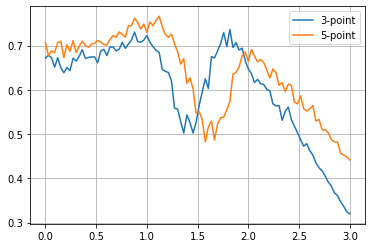

In [95]:
plt.plot(kh_values, s3, label="3-point");
plt.plot(kh_values, s5, label="5-point");
plt.grid(True)
plt.legend();